用于显示图片和图片上的标记情况

In [1]:
from kitti_util import *
import cv2
from plot_util import *

执行

1


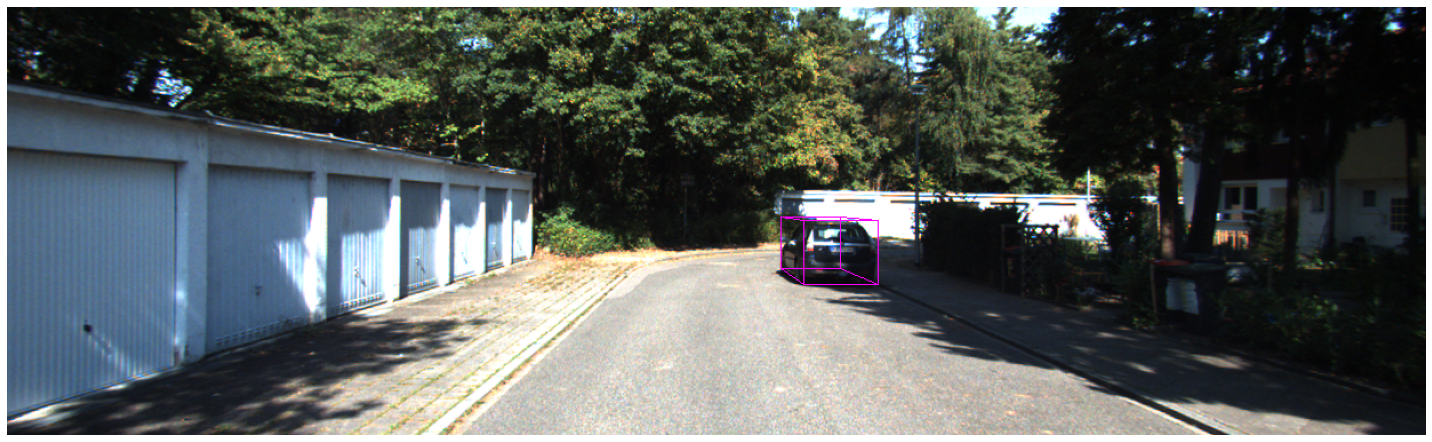

In [2]:
img_id = 2500
kitti_path="/home/huangjiangeng/OpenPCDet/data/kitti/training"

calib = Calibration(kitti_path+"/calib/%06d.txt"%img_id) ## Path ## need to be changed
path_img = kitti_path+"/image_2/%06d.png"%img_id
df = read_detection(kitti_path+"/label_2/%06d.txt"%img_id)  #标签
df.head()
print(len(df))

image = cv2.imread(path_img)
##############plot 3D box#####################
for o in range(len(df)):
    corners_3d_cam2 = compute_3d_box_cam2(*df.loc[o, ['height', 'width', 'length', 'pos_x', 'pos_y', 'pos_z', 'rot_y']])
    pts_2d = calib.project_rect_to_image(corners_3d_cam2.T)
    image = draw_projected_box3d(image, pts_2d, color=(255,0,255), thickness=1)

plt_show_cv2_image(image)